### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
global_temp = pd.read_csv('GlobalTemperatures.csv')

In [3]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

### Analyse Whether there is any global warning ?

In [4]:
def fetch_year(date):
    return date.split('-')[0]

In [5]:
global_temp['years'] = global_temp['dt'].apply(fetch_year)

In [6]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  
0                                        NaN  1750  
1                                        NaN  1750  
2                                        NaN  1750  
3                                        NaN  1750  
4                                        NaN  1750

In [7]:
data = global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [8]:
data

years  LandAverageTemperature  LandAverageTemperatureUncertainty
0    1750                8.719364                           2.637818
1    1751                7.976143                           2.781143
2    1752                5.779833                           2.977000
3    1753                8.388083                           3.176000
4    1754                8.469333                           3.494250
..    ...                     ...                                ...
261  2011                9.516000                           0.082000
262  2012                9.507333                           0.083417
263  2013                9.606500                           0.097667
264  2014                9.570667                           0.090167
265  2015                9.831000                           0.092167

[266 rows x 3 columns]

In [9]:
data['Uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [10]:
data.head()

years  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750                8.719364                           2.637818   
1  1751                7.976143                           2.781143   
2  1752                5.779833                           2.977000   
3  1753                8.388083                           3.176000   
4  1754                8.469333                           3.494250   

   Uncertainty_top  Uncertainty_bottom  
0        11.357182            6.081545  
1        10.757286            5.195000  
2         8.756833            2.802833  
3        11.564083            5.212083  
4        11.963583            4.975083

In [11]:
fig = px.line(data,x='years',y=['LandAverageTemperature','Uncertainty_top','Uncertainty_bottom'],title='Average Land Temperature in World')
fig.show()

### Explore Average Temperature in each Season

In [12]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  
0                                        NaN  1750  
1                                        NaN  1750  
2                                        NaN  1750  
3                                        NaN  1750  
4                                        NaN  1750

In [13]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [14]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [15]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [16]:
global_temp['month'] = global_temp['dt'].dt.month

In [17]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  month  
0                                        NaN  1750      1  
1                                        NaN  1750      2  
2                                        NaN  1750      3  
3                                        NaN  1750      4  
4                                        NaN  1750      5

In [18]:
def get_season(month):
    if month >=3 and month <=5:
        return 'spring'
    elif month >=6 and month <=8:
        return 'summer'
    elif month >=9 and month <=11:
        return  'autumn'
    else:
        return 'winter'

In [19]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [20]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty years  month  season  
0                                        NaN  1750      1  winter  
1                                        NaN  1750      2  winter  
2                                        NaN  1750      3  spring  
3                                        NaN  1750      4  spring  
4                                        NaN  1750      5  spring

In [21]:
years = global_temp['years'].unique()

In [22]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

In [23]:
for year in years:
    current_df = global_temp[global_temp['years'] == year]
    spring_temps.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())

In [24]:
season = pd.DataFrame()

In [25]:
season['year'] = years
season['spring_temps'] = spring_temps
season['summer_temps'] = summer_temps
season['autumn_temps'] = autumn_temps
season['winter_temps'] = winter_temps

In [26]:
season.head()

year  spring_temps  summer_temps  autumn_temps  winter_temps
0  1750      8.563000     14.518333      8.890000      2.963000
1  1751      6.735000     14.116000     10.673000      1.729000
2  1752      7.035500           NaN      7.587000      2.717000
3  1753      8.627333     14.608333      9.212333      1.104333
4  1754      9.074333     14.208333      8.957333      1.637333

In [27]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'], dtype='object')

In [28]:
fig = px.line(season,x='year',y=['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'],title='Average temperature in each season')
fig.show()

# Data preprocessing

In [29]:
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [30]:
cities.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [31]:
cities.shape

(8599212, 7)

In [32]:
usa = cities[cities['Country'] == 'United States']

In [33]:
data = ['New York','Los Angeles','San Francisco']

In [34]:
data2 = usa[usa['City'].isin(data)]

In [35]:
data2.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
4356748  1849-01-01               8.819                          2.558   
4356749  1849-02-01               9.577                          1.970   
4356750  1849-03-01              11.814                          2.173   
4356751  1849-04-01              13.704                          2.902   
4356752  1849-05-01              14.834                          2.017   

                City        Country Latitude Longitude  
4356748  Los Angeles  United States   34.56N   118.70W  
4356749  Los Angeles  United States   34.56N   118.70W  
4356750  Los Angeles  United States   34.56N   118.70W  
4356751  Los Angeles  United States   34.56N   118.70W  
4356752  Los Angeles  United States   34.56N   118.70W

In [36]:
data2 = data2[['dt','AverageTemperature']]

In [37]:
data2.head()

dt  AverageTemperature
4356748  1849-01-01               8.819
4356749  1849-02-01               9.577
4356750  1849-03-01              11.814
4356751  1849-04-01              13.704
4356752  1849-05-01              14.834

In [38]:
data2.columns = ['Date','Temp']

In [39]:
data2.head()

Date    Temp
4356748  1849-01-01   8.819
4356749  1849-02-01   9.577
4356750  1849-03-01  11.814
4356751  1849-04-01  13.704
4356752  1849-05-01  14.834

In [40]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [41]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [42]:
data2.dropna(inplace=True)

In [43]:
data2.shape

(7073, 2)

In [44]:
data2.set_index('Date',inplace=True)

In [45]:
data2.head()

Temp
Date              
1849-01-01   8.819
1849-02-01   9.577
1849-03-01  11.814
1849-04-01  13.704
1849-05-01  14.834

### Check whether Data is stationery or not, if not make it stationery

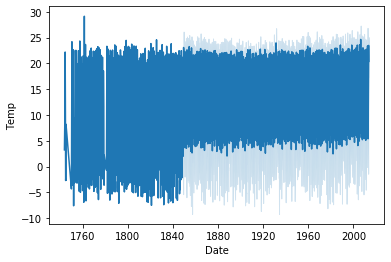

In [46]:
sns.lineplot(x=data2.index,y=data2['Temp'])

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
adfuller(data2['Temp'])

(-2.0063893036758076,
 0.2837786583333207,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

In [49]:
def adfuller_test(Temp):
    result = adfuller(Temp)
    labels = ['ADF Test stats','p-value','#lags used','no of observations used']
    for value,label in zip(result,labels):
        print('{} : {}'.format(label,value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypo, hence we can reject the null hypo and data is stationery')
    else:
        print('Weak evidence against the null hypo, hence we failed to reject the null hypo and data is not stationery')

In [50]:
adfuller_test(data2['Temp'])

ADF Test stats : -2.0063893036758076
p-value : 0.2837786583333207
#lags used : 35
no of observations used : 7037
Weak evidence against the null hypo, hence we failed to reject the null hypo and data is not stationery


### Make our data stationery

In [51]:
df = data2.copy()

In [52]:
df.head()

Temp
Date              
1849-01-01   8.819
1849-02-01   9.577
1849-03-01  11.814
1849-04-01  13.704
1849-05-01  14.834

In [53]:
df['Temp'].shift(1)

Date
1849-01-01       NaN
1849-02-01     8.819
1849-03-01     9.577
1849-04-01    11.814
1849-05-01    13.704
               ...  
2013-05-01    15.996
2013-06-01    17.434
2013-07-01    19.759
2013-08-01    20.657
2013-09-01    19.731
Name: Temp, Length: 7073, dtype: float64

In [54]:
df['first_diff_temp'] = df['Temp'] - df['Temp'].shift(12) # 12 because we have 12 months in a year

In [55]:
df.head(20)

Temp  first_diff_temp
Date                               
1849-01-01   8.819              NaN
1849-02-01   9.577              NaN
1849-03-01  11.814              NaN
1849-04-01  13.704              NaN
1849-05-01  14.834              NaN
1849-06-01  21.173              NaN
1849-07-01  26.159              NaN
1849-08-01  26.099              NaN
1849-09-01  21.848              NaN
1849-10-01  16.549              NaN
1849-11-01  10.907              NaN
1849-12-01   7.032              NaN
1850-01-01   7.087           -1.732
1850-02-01   8.575           -1.002
1850-03-01  10.365           -1.449
1850-04-01  13.735            0.031
1850-05-01  16.633            1.799
1850-06-01  20.241           -0.932
1850-07-01  23.445           -2.714
1850-08-01  25.935           -0.164

In [56]:
adfuller_test(df['first_diff_temp'].dropna())

ADF Test stats : -21.2396504049109
p-value : 0.0
#lags used : 35
no of observations used : 7025
Strong evidence against the null hypo, hence we can reject the null hypo and data is stationery


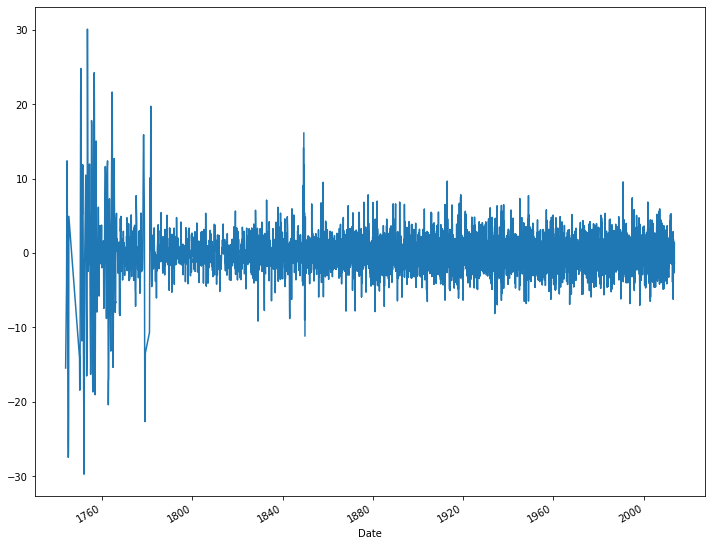

In [57]:
df['first_diff_temp'].plot(figsize=(12,10))

### Examine  seasonality in our data

In [58]:
data2.head()

Temp
Date              
1849-01-01   8.819
1849-02-01   9.577
1849-03-01  11.814
1849-04-01  13.704
1849-05-01  14.834

In [59]:
data2['month'] = data2.index.month
data2['year'] = data2.index.year

In [60]:
data2.head()

Temp  month  year
Date                           
1849-01-01   8.819      1  1849
1849-02-01   9.577      2  1849
1849-03-01  11.814      3  1849
1849-04-01  13.704      4  1849
1849-05-01  14.834      5  1849

In [61]:
pivot = data2.pivot_table(index='month',columns='year',values='Temp')

In [62]:
pivot

year    1743    1744   1745    1750    1751   1752    1753    1754    1755  \
month                                                                        
1        NaN     NaN -2.363  -4.310  -3.591 -7.588  -3.122  -2.252  -3.193   
2        NaN     NaN -2.671  -2.719  -2.051    NaN  -1.467  -2.583  -1.802   
3        NaN     NaN  1.363   2.773   3.256  3.322   4.207   2.728   1.112   
4        NaN   9.788  8.209   8.848   7.992  7.402   8.099     NaN   8.714   
5        NaN  15.708    NaN  15.411     NaN    NaN  15.330     NaN  15.238   
6        NaN  21.210    NaN  19.017  20.724    NaN  20.820  20.075  19.964   
7        NaN  22.207    NaN  24.203  22.668    NaN  22.524  22.503     NaN   
8        NaN     NaN    NaN  22.135  21.547    NaN  21.324  21.461     NaN   
9        NaN  14.922    NaN  17.445  15.812    NaN  15.548  16.281  16.137   
10       NaN   8.968    NaN   9.076     NaN  9.391  10.479  11.477   8.669   
11     3.264   3.161    NaN     NaN     NaN  5.831   3.363     NaN   3.599   
12       NaN  -2.681    NaN  -1.093     NaN -1.471  -2.854  -0.752  -2.381   

year     1756  ...       2004       2005       2006       2007       2008  \
month          ...                                                          
1      -1.985  ...   4.080333   4.923000   7.135333   5.656000   5.216333   
2       0.259  ...   6.100000   7.297000   7.547667   5.634000   6.754333   
3         NaN  ...  12.184000   9.124667   7.527333  10.586000   9.733667   
4         NaN  ...  13.806333  12.546000  12.051667  12.342000  13.113000   
5         NaN  ...  17.817333  15.982333  17.123333  17.150000  15.800333   
6      20.488  ...  19.872000  19.775333  21.395333  20.514333  21.474667   
7      22.452  ...  22.246333  23.611667  24.655333  22.628333  23.020000   
8      21.208  ...  22.101333  23.028333  21.920333  22.690000  22.305333   
9      17.345  ...  20.669333  19.427667  19.365333  19.559000  20.686667   
10      9.662  ...  14.205667  15.098000  14.368667  15.985667  15.699000   
11      2.894  ...   9.758333  11.739667  11.861333  10.836333  11.423000   
12     -2.900  ...   6.428000   6.582667   7.701667   5.474333   5.610667   

year        2009       2010       2011       2012       2013  
month                                                         
1       5.550333   5.776667   5.109333   7.177667   5.388333  
2       6.540667   6.788000   5.777333   7.970000   6.222667  
3       9.211000  10.486667   9.115000  10.604333  10.162333  
4      12.744000  12.254000  12.710000  13.075000  13.880000  
5      17.565667  15.856333  15.724000  17.670333  17.335333  
6      18.941667  20.436667  19.305000  19.904333  21.028333  
7      22.247667  22.538667  22.733333  22.654000  23.489667  
8      22.578000  21.665333  22.028667  23.384667  21.654667  
9      20.752667  20.537333  20.856333  20.655667  20.393333  
10     14.313333  15.170333  15.846667  16.147667        NaN  
11     11.484000  10.032333  10.378000  10.457667        NaN  
12      5.425333   6.119667   6.991000   6.749333        NaN  

[12 rows x 266 columns]

Text(0, 0.5, 'Temperatures')

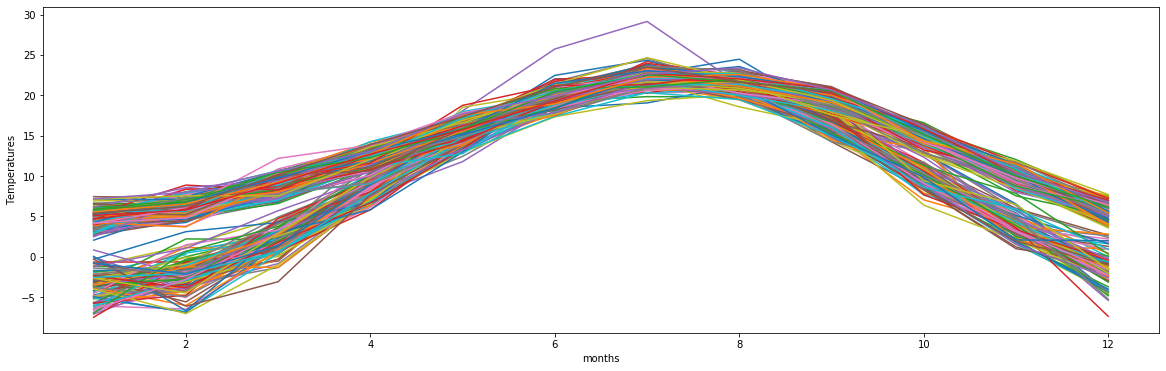

In [63]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('months')
plt.ylabel('Temperatures')

In [64]:
monthly_seasonality = pivot.mean(axis=1)

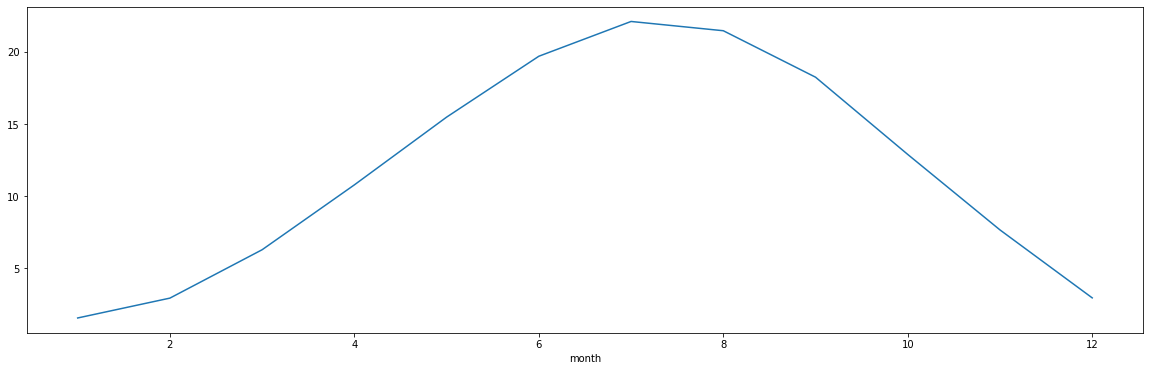

In [65]:
monthly_seasonality.plot(figsize=(20,6))

### Build Time Series Model using Moving Average

In [66]:
df.head()

Temp  first_diff_temp
Date                               
1849-01-01   8.819              NaN
1849-02-01   9.577              NaN
1849-03-01  11.814              NaN
1849-04-01  13.704              NaN
1849-05-01  14.834              NaN

In [67]:
df.dropna(inplace=True)

In [68]:
df = df[['first_diff_temp']]

In [69]:
df.head()

first_diff_temp
Date                       
1850-01-01           -1.732
1850-02-01           -1.002
1850-03-01           -1.449
1850-04-01            0.031
1850-05-01            1.799

In [70]:
df['first_diff_temp'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_diff_temp, Length: 7061, dtype: float64

In [71]:
value = pd.DataFrame(df['first_diff_temp'])

In [72]:
temps_df = pd.concat([value,df['first_diff_temp'].rolling(window=5).mean()],axis=1)
temps_df.columns =['actual_temp','forecast_temp']

In [73]:
temps_df.head()

actual_temp  forecast_temp
Date                                  
1850-01-01       -1.732            NaN
1850-02-01       -1.002            NaN
1850-03-01       -1.449            NaN
1850-04-01        0.031            NaN
1850-05-01        1.799        -0.4706

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
np.sqrt(mean_squared_error(temps_df['forecast_temp'][4:],temps_df['actual_temp'][4:]))

2.3934235122562058

In [76]:
# This value means there is an error of +2.39 going to happen in my prediction on every particular day

### Apply ARIMA on our data

In [77]:
# find value of p,d,q
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [78]:
df.head()

first_diff_temp
Date                       
1850-01-01           -1.732
1850-02-01           -1.002
1850-03-01           -1.449
1850-04-01            0.031
1850-05-01            1.799

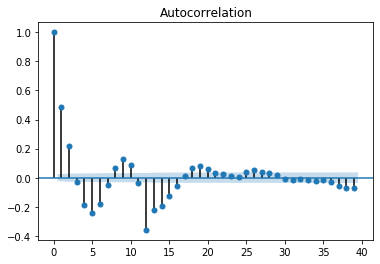

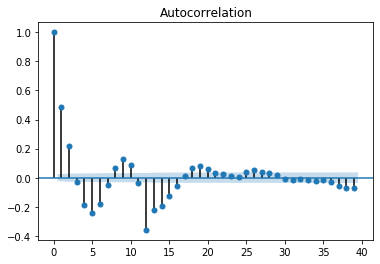

In [79]:
# p value
plot_acf(df['first_diff_temp'].dropna())

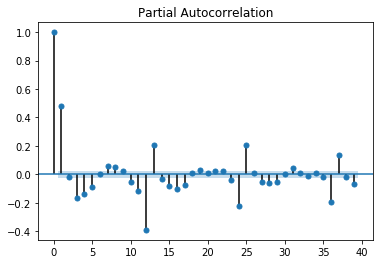

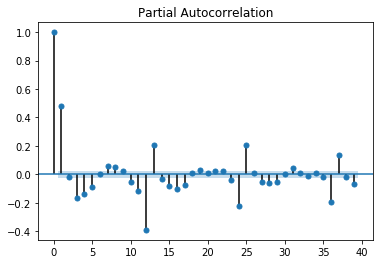

In [80]:
# q value
plot_pacf(df['first_diff_temp'].dropna())

In [81]:
df.isna().sum()

first_diff_temp    0
dtype: int64

In [82]:
df.shape

(7061, 1)

In [83]:
training_data = df[0:6000]
test_data = df[6000:]

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
arima = ARIMA(training_data,order=(2,1,3))

In [86]:
model = arima.fit()

In [87]:
#prediction
predictions = model.forecast(steps = len(test_data))[0]

In [88]:
np.sqrt(mean_squared_error(test_data,predictions))

1.512046179861547

### Cross validate our time series model

In [91]:
p_values = range(0,4)
q_values = range(0,4)
d_values = range(0,3)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            training_data = df[0:6000]
            test_data = df[6000:]
            predictions = []
            for i in range(len(test_data)):
                try:
                    arima = ARIMA(training_data,order)
                    model = arima.fit(disp=0)
                    prediction = model.forecast()[0]
                    predictions.append(prediction)
                    error = mean_squared_error(test_data,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue

MSE is 2.28367292845601 with order (0, 0, 0)
MSE is 2.5227586436955685 with order (0, 0, 1)
MSE is 2.29537124228579 with order (0, 0, 2)
MSE is 2.3855390583446163 with order (0, 0, 3)
MSE is 2.6894115719830562 with order (0, 1, 0)
MSE is 2.393995721716528 with order (0, 1, 1)
MSE is 2.5016286276250033 with order (0, 1, 2)
MSE is 2.291679729975221 with order (0, 1, 3)
MSE is 6.517833814479574 with order (0, 2, 0)
MSE is 2.6906659849905328 with order (0, 2, 1)
MSE is 2.388835284398432 with order (1, 0, 0)
MSE is 2.4035275704327663 with order (1, 0, 1)
MSE is 2.320212916999615 with order (1, 0, 2)
MSE is 2.381969692073565 with order (1, 0, 3)
MSE is 2.380555409880445 with order (1, 1, 0)
MSE is 2.378710468657072 with order (1, 1, 1)
MSE is 2.3925764600299204 with order (1, 1, 2)
MSE is 2.3141997371352514 with order (1, 1, 3)
MSE is 2.3498103141537063 with order (1, 2, 0)
MSE is 2.41270848798822 with order (2, 0, 0)
MSE is 2.397182701407201 with order (2, 0, 1)
MSE is 2.3390141091222785 wi